In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("bankfraud.csv")

In [80]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [6]:
df.isna()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
594638,False,False,False,False,False,False,False,False,False,False
594639,False,False,False,False,False,False,False,False,False,False
594640,False,False,False,False,False,False,False,False,False,False
594641,False,False,False,False,False,False,False,False,False,False


In [11]:
df['fraud'].value_counts()


0    587443
1      7200
Name: fraud, dtype: int64

In [54]:
df['merchant'].value_counts()

'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M1788569036'   

In [ ]:
sns.distplot(df,color = "Blue")
plt.xlabel("no of fraud")
plt.ylabel("Probability of the occurences")
plt.title("Distribution of People weights in kg's")

In [14]:
df.groupby('category').sum()['fraud']

category
'es_barsandrestaurants'     120
'es_contents'                 0
'es_fashion'                116
'es_food'                     0
'es_health'                1696
'es_home'                   302
'es_hotelservices'          548
'es_hyper'                  280
'es_leisure'                474
'es_otherservices'          228
'es_sportsandtoys'         1982
'es_tech'                   158
'es_transportation'           0
'es_travel'                 578
'es_wellnessandbeauty'      718
Name: fraud, dtype: int64

In [20]:
df1 = pd.DataFrame(df.groupby('category').sum()['fraud'])

df1[1]

In [32]:
df1['category'] = df1['category'].str[4:]
df1['category'] = df1['category'].str[:-1]
df1

,index,category,fraud
0,0,barsandrestaurants,120
1,1,contents,0
2,2,fashion,116
3,3,food,0
4,4,health,1696
5,5,home,302
6,6,hotelservices,548
7,7,hyper,280
8,8,leisure,474
9,9,otherservices,228


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     15 non-null     int64 
 1   category  15 non-null     object
 2   fraud     15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [38]:
df1.drop(['index'], axis='columns', inplace=True)

In [39]:
df1

,category,fraud
0,barsandrestaurants,120
1,contents,0
2,fashion,116
3,food,0
4,health,1696
5,home,302
6,hotelservices,548
7,hyper,280
8,leisure,474
9,otherservices,228


[Text(0, 0, 'barsandrestaurants'),
 Text(0, 0, 'contents'),
 Text(0, 0, 'fashion'),
 Text(0, 0, 'food'),
 Text(0, 0, 'health'),
 Text(0, 0, 'home'),
 Text(0, 0, 'hotelservices'),
 Text(0, 0, 'hyper'),
 Text(0, 0, 'leisure'),
 Text(0, 0, 'otherservices'),
 Text(0, 0, 'sportsandtoys'),
 Text(0, 0, 'tech'),
 Text(0, 0, 'transportation'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'wellnessandbeauty')]

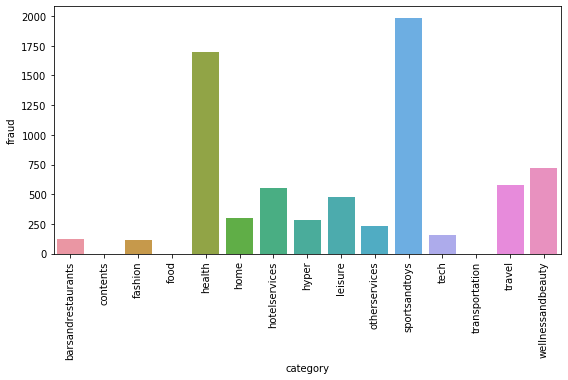

In [52]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
sns.barplot(x=df1.category, y=df1.fraud, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


In [ ]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
sns.barplot(x=df.category, y=df.fraud, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

In [ ]:
plt.figure(figsize=(17,6))
plt.title("Scores of the countries")
plt.xlabel("Date in Years")

sns.set_style('dark')
sns.lineplot(data = fifa_csv['ARG'],label = 'Argentina')
sns.lineplot(data = fifa_csv['GER'],label = 'Germany')

In [ ]:
sns.lineplot(data=fifa_csv['ITA'],label="ITALY") plt.figure(figsize=(17,6))
plt.title("Scores of the countries")
plt.ylabel("Scores in numbers")
plt.xlabel("Date in Years")
sns.set_style(style='whitegrid')
sns.lineplot(data=fifa_csv['ITA'],label="ITALY")

In [58]:
df1 = pd.DataFrame(df.groupby('merchant').sum()['fraud']).idxmax()
df1

fraud    'M480139044'
dtype: object

In [72]:
df_M480139044 = pd.DataFrame(df.loc[df["merchant"] == "'M480139044'"])
df_M480139044.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
89,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
341,0,'C1891401770','4','F','28007','M480139044','28007','es_health',266.59,0
452,0,'C715527139','1','M','28007','M480139044','28007','es_health',44.14,0
652,0,'C1560259762','3','F','28007','M480139044','28007','es_health',248.42,0


In [74]:
df_M480139044.category.value_counts()

'es_health'    3508
Name: category, dtype: int64

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


In [88]:
df_sports = pd.DataFrame(df.loc[df["category"] == "'es_sportsandtoys'"])


In [90]:
df_sports.fraud.value_counts()

0    2020
1    1982
Name: fraud, dtype: int64

In [91]:
df_sports = pd.read_csv("Sports_fraud.csv")

In [92]:
df_sports.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1685492470','2','F','28007','M980657600','28007','es_sportsandtoys',278.02,1
1,0,'C1275518867','5','F','28007','M980657600','28007','es_sportsandtoys',69.53,1
2,0,'C1734487337','4','F','28007','M1741626453','28007','es_sportsandtoys',70.15,1
3,0,'C204205576','3','F','28007','M1741626453','28007','es_sportsandtoys',238.82,1
4,0,'C1275518867','5','F','28007','M980657600','28007','es_sportsandtoys',305.11,1


In [93]:
df_sports.groupby('age').sum()['fraud']

age
'0'     12
'1'    185
'2'    655
'3'    469
'4'    368
'5'    213
'6'     80
Name: fraud, dtype: int64

In [94]:
df_sports.groupby('gender').sum()['fraud']

gender
'F'    1305
'M'     677
Name: fraud, dtype: int64

In [98]:
plt.figure(figsize=(17,6))
sns.barplot(x=df_sports['gender']',y =df_sports['fraud'])

SyntaxError: invalid syntax (<ipython-input-98-aba0bc9a8722>, line 2)

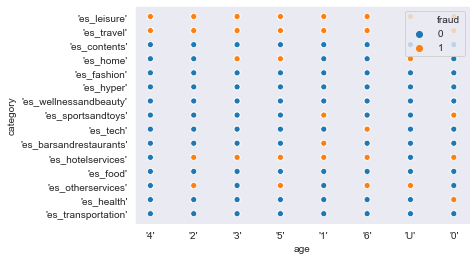

In [104]:
sns.scatterplot(x= df['age'],y = df['category'],hue = df['fraud'])

In [ ]:
df_M480139044

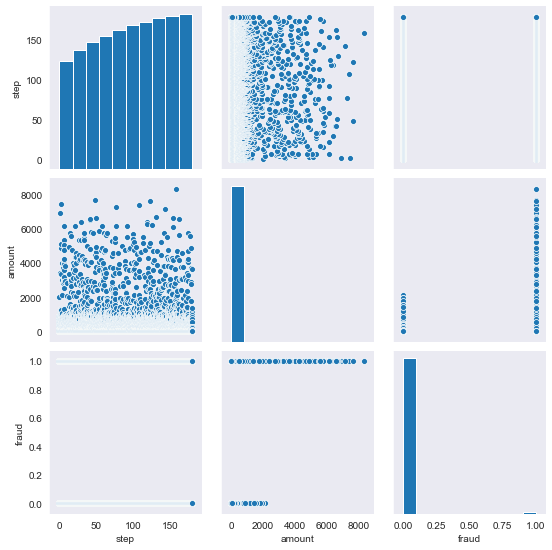

In [105]:
sns.pairplot(df)

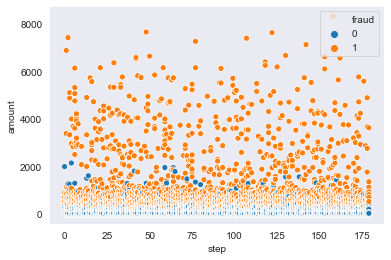

In [106]:
sns.scatterplot(x= df['step'],y = df['amount'],hue = df['fraud'])

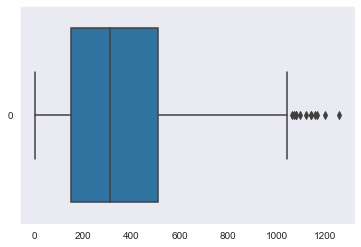

In [110]:
sns.boxplot(data=df_sports.amount,orient = 'h')


In [112]:
df_sports.describe

<bound method NDFrame.describe of       step       customer  age gender zipcodeOri       merchant zipMerchant  \
0        0  'C1685492470'  '2'    'F'    '28007'   'M980657600'     '28007'   
1        0  'C1275518867'  '5'    'F'    '28007'   'M980657600'     '28007'   
2        0  'C1734487337'  '4'    'F'    '28007'  'M1741626453'     '28007'   
3        0   'C204205576'  '3'    'F'    '28007'  'M1741626453'     '28007'   
4        0  'C1275518867'  '5'    'F'    '28007'   'M980657600'     '28007'   
...    ...            ...  ...    ...        ...            ...         ...   
1977   179  'C1647495093'  '3'    'M'    '28007'   'M980657600'     '28007'   
1978   179   'C910454738'  '4'    'F'    '28007'   'M980657600'     '28007'   
1979   179  'C2015444413'  '2'    'F'    '28007'   'M980657600'     '28007'   
1980   179   'C881073190'  '2'    'F'    '28007'   'M980657600'     '28007'   
1981   179    'C95082443'  '2'    'M'    '28007'   'M980657600'     '28007'   

                c

In [114]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

ModuleNotFoundError: No module named 'pandas_profiling'

No handles with labels found to put in legend.


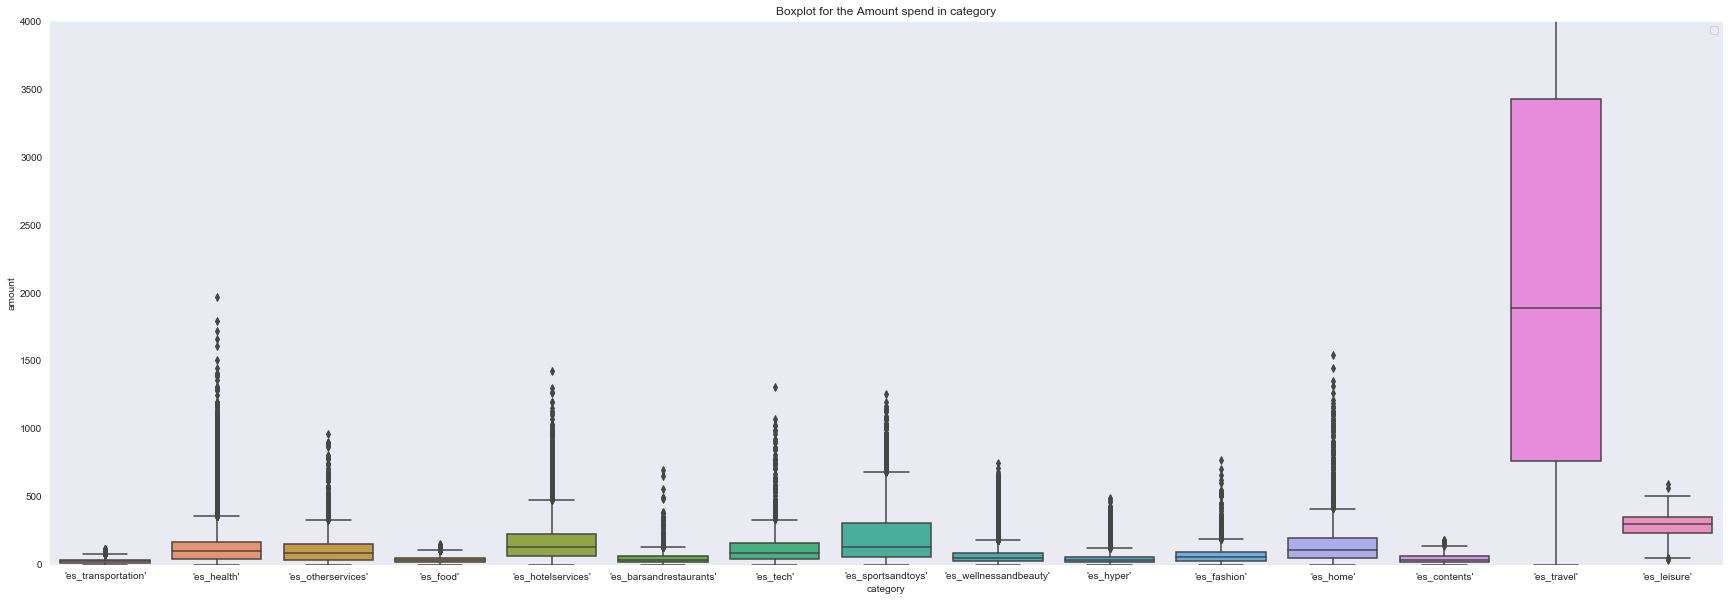

In [116]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df.category,y=df.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

[Text(0, 0, "'M'"), Text(0, 0, "'F'"), Text(0, 0, "'E'"), Text(0, 0, "'U'")]

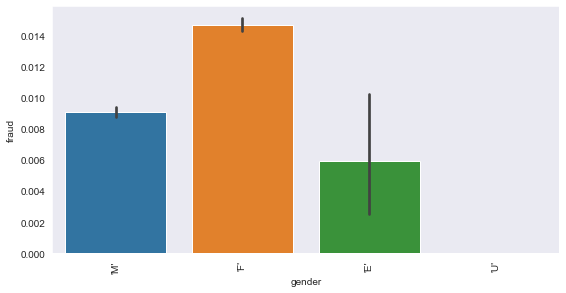

In [118]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
sns.barplot(x=df.gender, y=df.fraud, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

No handles with labels found to put in legend.


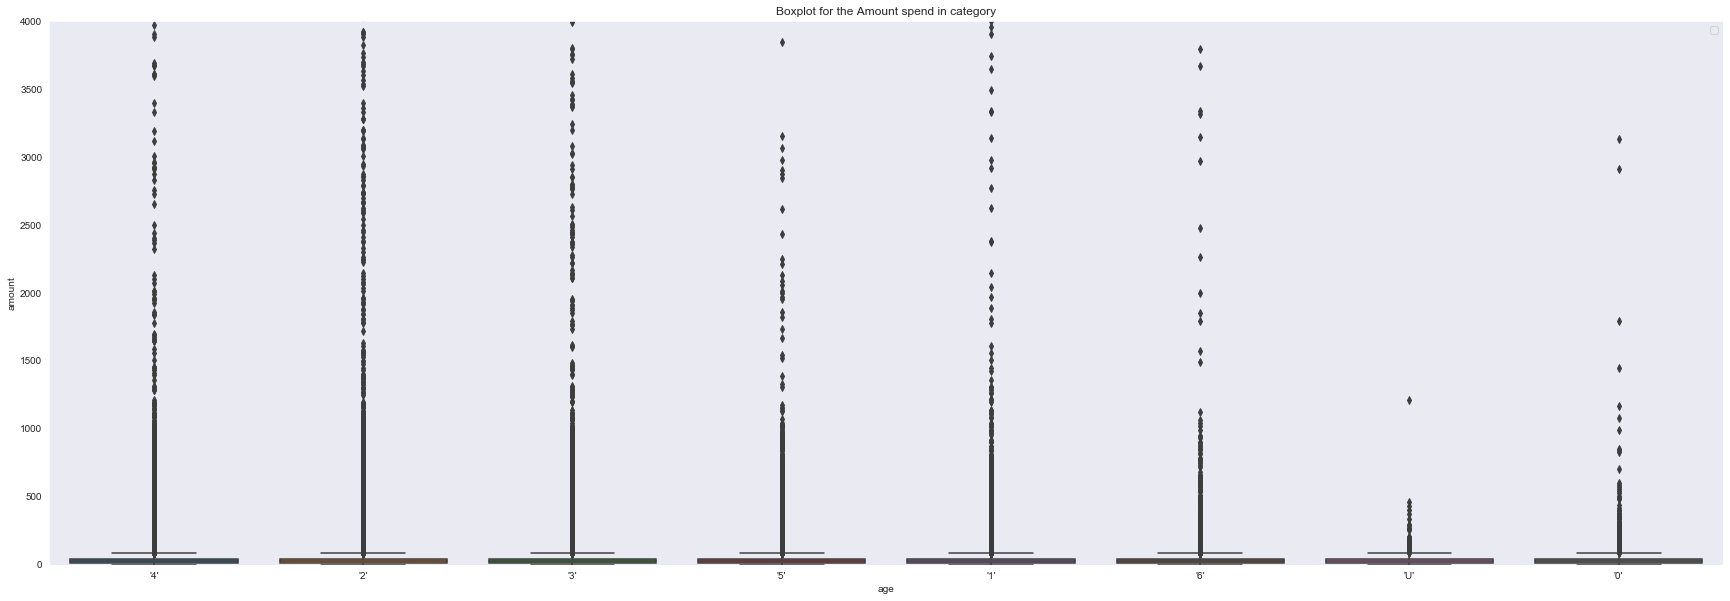

In [120]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df.age,y=df.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()